In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [4]:
df = pd.read_csv('Data/hiring.csv')
df.head(2)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000


In [5]:
df['experience'] = df['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [6]:
import math
test_score_avg = math.floor(df['test_score(out of 10)'].median())
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(test_score_avg)
df['experience'] = df['experience'].fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


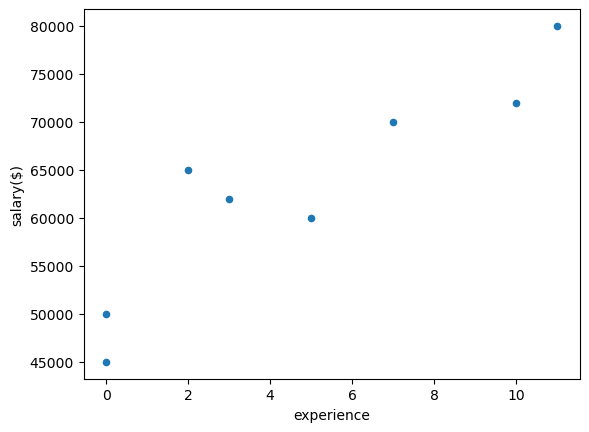

In [8]:
df.plot(kind='scatter', x='experience', y='salary($)')
plt.show()

In [10]:
model = linear_model.LinearRegression()
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [18]:
model.predict([[2,10,10]])



c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63872.63464338])